# Correlated photon experiments

The following tries to build a quantum circuits equivalent to the experiments presented on __Qubit quantum mechanics with correlated-photon experiments__(Galvez, 2009).

## Mach-Zehnder interferometer

In [17]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info.operators import Operator
from qiskit.visualization import plot_histogram
from cmath import exp, pi
import numpy as np

deltas = np.linspace(0, 4 * np.pi, 40)
probs = []

for d in deltas:
	A = Operator([
		[1, 0],
		[0, exp(complex(0, d))],
	])	
	circuit = QuantumCircuit(1, 1)
	circuit.h(0)
	circuit.append(A, [0])
	circuit.h(0)
	circuit.measure(0, 0)

	simulator = AerSimulator()
	compiled_circuit = transpile(circuit, simulator)
	job = simulator.run(compiled_circuit, shots=10000)

	result = job.result()

	counts = result.get_counts(compiled_circuit)
	c0 = counts['0'] if '0' in counts else 0
	c1 = counts['1'] if '1' in counts else 0
	total = c0 + c1
	probs.append([c0, c1])

print("finished")

finished


In [31]:
from qiskit.visualization import array_to_latex
d = pi/ 4
A = Operator([
	[0, 1],
	[1, 0],
])
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.append(A, [0])
qc.h(0)
qc.save_unitary()

simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
unitary = simulator.run(compiled_circuit).result().get_unitary()

array_to_latex(unitary)

<IPython.core.display.Latex object>

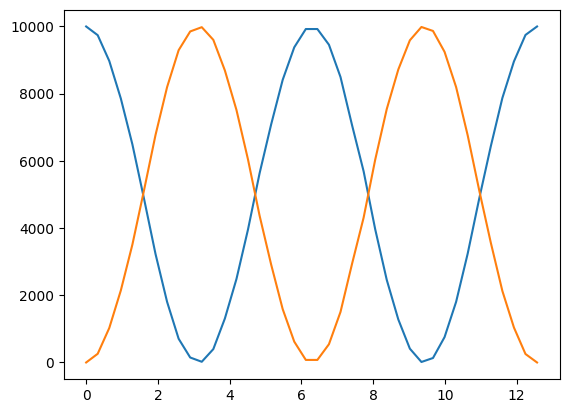

In [60]:
import matplotlib.pyplot as plt

y = np.array(probs)

plt.plot(deltas, y)
plt.show()

## Direction of propagation modes

In [16]:
from qiskit.visualization import array_to_latex

d = pi / 2
A = Operator([
	[1, 0],
	[0, exp(complex(0, d))],
])
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.h(1)
qc.append(A, [0])
qc.append(A, [1])
qc.h(0)
qc.h(1)
qc.save_unitary()

simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
unitary = simulator.run(compiled_circuit).result().get_unitary()

array_to_latex(unitary)

<IPython.core.display.Latex object>

In [12]:
qc.draw()

┌───┐┌─────────┐┌───┐ unitary 
q_0: ┤ H ├┤ Unitary ├┤ H ├────░────
     ├───┤├─────────┤├───┤    ░    
q_1: ┤ H ├┤ Unitary ├┤ H ├────░────
     └───┘└─────────┘└───┘    ░    
c: 2/══════════════════════════════

In [115]:
qc.clear()
qc.measure(0, 0)
qc.measure(1, 1)

simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
simulator.run(compiled_circuit, shots=10000).result().get_counts()

{'00': 10000}